## * Import the Library


In [457]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

## Load the Data

In [458]:
!wget -O loan_train.csv     https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
dataset = pd.read_csv("loan_train.csv")

--2019-07-08 21:00:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-07-08 21:00:56 (13.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Interpreting and Visualizing raw dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bb90caeb8>]],
      dtype=object)

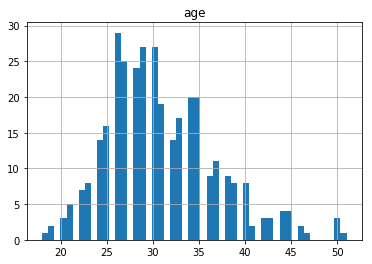

In [459]:
dataset.hist(column='age', bins=50)

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

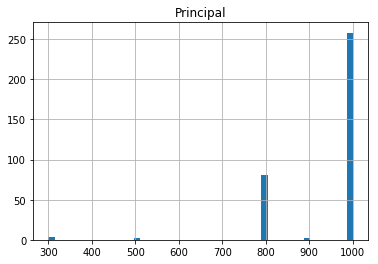

In [460]:
dataset.hist(column='Principal', bins=50)
dataset['Principal'].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

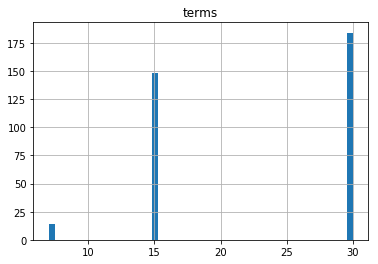

In [461]:
dataset.hist(column='terms', bins=50)
dataset['terms'].value_counts()

In [462]:
dataset['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [463]:
dataset['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

### Select Relevent Data

In [464]:
dataset = dataset[['loan_status', 'Principal', 'terms', 'age', 'education', 'Gender']]
dataset.head()

,loan_status,Principal,terms,age,education,Gender
0,PAIDOFF,1000,30,45,High School or Below,male
1,PAIDOFF,1000,30,33,Bechalor,female
2,PAIDOFF,1000,15,27,college,male
3,PAIDOFF,1000,30,28,college,female
4,PAIDOFF,1000,30,29,college,male


## Select Relevent Data for Modelling

In [465]:
#X = dataset.iloc[:,[1,2,3,4,5]].values # take the last column
X = dataset[['Principal','terms','age', 'education','Gender']].values
# y = dataset.iloc[:,0].values # take the last column
y = dataset[['loan_status']].values

## Encoding Categorical Data

In [466]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # class LabelEncoder, OneHotencoder

labelencoder_y = LabelEncoder()   
y=labelencoder_y.fit_transform(y)
# le_y = LabelEncoder()
# le_y.fit(['PAIDOFF', 'COLLECTION'])
le_education = LabelEncoder()
X[:,3] = le_education.fit_transform(X[:,3].astype(str))
le_Gender = LabelEncoder()
X[:,4] = le_Gender.fit_transform(X[:,4])
print(X[0:10, :])

[[1000 30 45 1 1]
 [1000 30 33 0 0]
 [1000 15 27 3 1]
 [1000 30 28 3 0]
 [1000 30 29 3 1]
 [1000 30 36 3 1]
 [1000 30 28 3 1]
 [800 15 26 3 1]
 [300 7 29 3 1]
 [1000 15 39 1 1]]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### One Hot Encoder
ensure the code is not comparable by number values.

In [467]:

# onehotencoder_education = OneHotEncoder(categorical_features=[3]) # ensure the code is not comparable by number values.
# X = onehotencoder_education.fit_transform(X).toarray()
# onehotencoder_sex = OneHotEncoder(categorical_features=[7]) # ensure the code is not comparable by number values.
# X = onehotencoder_sex.fit_transform(X).toarray()
# print ('Below is the encoded dataset:', "\n")
# print (X[0:40, :], "\n")
# print ('The first two columns are encoded for sex, the 3rd to 7th Column are encoded for education')

### Feature scaling

In [468]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
# print ('Below is the encoded dataset after fearture scaling:', "\n")
# print (X[0:10, :],  "\n")
# print ('The first two columns are encoded for sex, the 3rd to 7th Column are encoded for education')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### training test data split

In [469]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

## KNN Classification

In [470]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_KNN = neigh.predict(X_test)
# Evaluation
print ('KNN Evaluation (Test set Accuracy):  ')
from sklearn import metrics
#print("Metrics Accuracy Score: Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Metrics Accuracy Score:", metrics.accuracy_score(y_test, yhat_KNN))

from sklearn.metrics import jaccard_similarity_score
a1 = jaccard_similarity_score(y_test, yhat_KNN)

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

a2 = f1_score(y_test, yhat_KNN, average='weighted')

KNN Evaluation (Test set Accuracy):  
Metrics Accuracy Score: 0.8714285714285714


### Finding the Best K

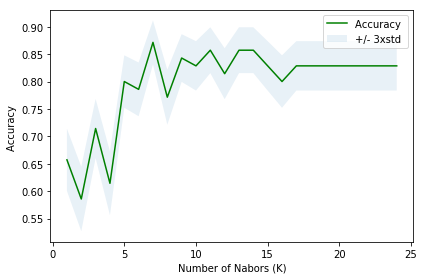

In [471]:
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)    
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

[[58  0]
 [ 9  3]]
Confusion matrix, without normalization
[[58  0]
 [ 9  3]]


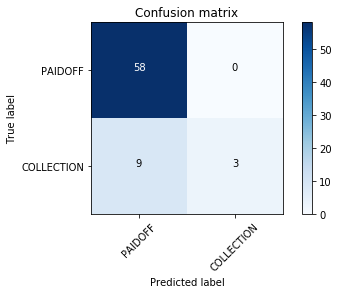

In [472]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat_KNN, labels=[1,0]))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

## Logistic Regression

In [476]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

# Predicting the results using logistic Regression
yhat_LR = LR.predict(X_test)
# Evaluate the result:
from sklearn import metrics
b1 = jaccard_similarity_score(y_test, yhat_LR)

yhat_prob_LR = LR.predict_proba(X_test)
from sklearn.metrics import log_loss
d = log_loss(y_test, yhat_prob_LR)

b2 = f1_score(y_test, yhat_LR, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Confusion Matrix

## Support Vector Machine

In [478]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat_SVM = clf.predict(X_test)


c1 = jaccard_similarity_score(y_test, yhat_SVM)

c2 = f1_score(y_test, yhat_SVM, average='weighted') 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree

In [479]:

decisiontree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisiontree.fit(X_train,y_train)
yhat_decisiontree = decisiontree.predict(X_test)
# Evaluation
from sklearn import metrics
d1 = jaccard_similarity_score(y_test, yhat_decisiontree)
d2 = f1_score(y_test, yhat_decisiontree, average='weighted')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Summary

In [480]:
df2=pd.DataFrame({'Algorithm':['KNN','Logistic Regression','SVM','Decision Tree'],'Jacard':[a1,b1,c1,d1],'F1-score':[a2,b2,c2,d2],'LogLoss':['NA',d,'NA','NA']})
df2

,Algorithm,Jacard,F1-score,LogLoss
0,KNN,0.871429,0.837486,NA
1,Logistic Regression,0.828571,0.750893,0.474514
2,SVM,0.828571,0.750893,NA
3,Decision Tree,0.828571,0.750893,NA


### Happy Machine Learning !